In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
load = drive.CreateFile({'id':'19DibH0jqKR_usi_g7AVNFcz5atyaMi9o'})
load.GetContentFile('uber-raw-data-apr14.csv')
load = drive.CreateFile({'id':'1hmH97N9EEYTZxW4KY1epADXx4vzPm0-o'})
load.GetContentFile('uber-raw-data-may14.csv')
load = drive.CreateFile({'id':'1MAvYkw1-fFVv80mT0NCqks3_y5_MsVVf'})
load.GetContentFile('uber-raw-data-jun14.csv')
load = drive.CreateFile({'id':'1JGw_-hl4YIIV24Ou9Mkw8QE0uplhYyYB'})
load.GetContentFile('uber-raw-data-jul14.csv')
load = drive.CreateFile({'id':'1JaW7AuEdJmsmu8GBLLctwNlpCWVi8h0J'})
load.GetContentFile('uber-raw-data-aug14.csv')
load = drive.CreateFile({'id':'1RCFw-RsDVoMwPimX-AWE9xukIAF1Clhj'})
load.GetContentFile('uber-raw-data-sep14.csv')

# **UBER DATA ANALYSIS**

**Importing Libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

## **Pre-Processing**

In [0]:
d1 = pd.read_csv('uber-raw-data-apr14.csv')
d2 = pd.read_csv('uber-raw-data-may14.csv')
d3 = pd.read_csv('uber-raw-data-jun14.csv')
d4 = pd.read_csv('uber-raw-data-jul14.csv')
d5 = pd.read_csv('uber-raw-data-aug14.csv')
d6 = pd.read_csv('uber-raw-data-sep14.csv')
data=pd.concat([d1, d2, d3, d4, d5, d6])
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [0]:
data['Date/Time']= pd.to_datetime(data['Date/Time'])
data['Hour']=data['Date/Time'].dt.hour
data['Month']=data['Date/Time'].dt.month
data['Day']=data['Date/Time'].dt.day
data['Year']=data['Date/Time'].dt.year
data['Dayy']=data['Date/Time'].dt.day_name()
data.head()

,Date/Time,Lat,Lon,Base,Hour,Month,Day,Year,Dayy
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,4,1,2014,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,4,1,2014,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,4,1,2014,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,4,1,2014,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,4,1,2014,Tuesday


## **Data Visualization**

#**BAR GRAPHS**

**Grouping by Hour**

In [0]:
hourly_ride_data = data.groupby(['Hour'])['Date/Time'].count()
hourly_ride_data = hourly_ride_data.reset_index()
hourly_ride_data = hourly_ride_data.rename(columns = {'Date/Time':'ride_count'})
hourly_ride_data.head()

,Hour,ride_count
0,0,103836
1,1,67227
2,2,45865
3,3,48287
4,4,55230


**Bar Graph of Number of rides in every hour of a day**

Text(0.5, 1.0, 'Number of Rides vs Hour of Day')

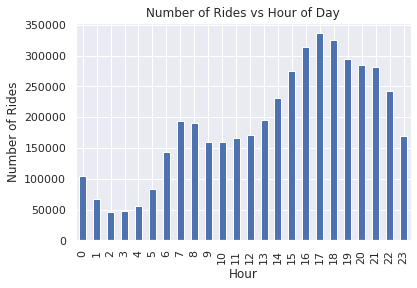

In [0]:
data.groupby(['Hour']).size().plot(kind='bar')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Hour of Day')

**Grouping by Hour and Month**

In [0]:
hourmonth_ride_data = data.groupby(['Hour','Month'])['Date/Time'].count()
hourmonth_ride_data = hourmonth_ride_data.reset_index()
hourmonth_ride_data = hourmonth_ride_data.rename(columns = {'Date/Time':'ride_count'})
hourmonth_ride_data.head()

,Hour,Month,ride_count
0,0,4,11910
1,0,5,13875
2,0,6,14514
3,0,7,17953
4,0,8,21451


**Bar Graph of Number of rides in every hour in different months**

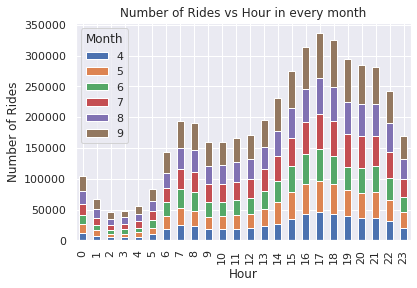

In [0]:
data.groupby(['Hour','Month']).size().unstack().plot(kind='bar',stacked=True)
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Hour in every month')
plt.show()

**Grouping by Day**

In [0]:
d_ride_data = data.groupby(['Day'])['Date/Time'].count()
d_ride_data = d_ride_data.reset_index()
d_ride_data = d_ride_data.rename(columns = {'Date/Time':'ride_count'})
d_ride_data.head()

,Day,ride_count
0,1,127430
1,2,143201
2,3,142983
3,4,140923
4,5,147054


**Bar Graph of Number of rides per day of month**

Text(0.5, 1.0, 'Number of Rides vs Day of Month')

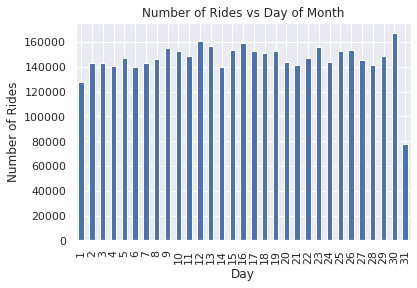

In [0]:
data.groupby(['Day']).size().plot(kind='bar')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Day of Month')

**Grouping by Day and Month**

In [0]:
dym_ride_data = data.groupby(['Day','Month'])['Date/Time'].count()
dym_ride_data = dym_ride_data.reset_index()
dym_ride_data = dym_ride_data.rename(columns = {'Date/Time':'ride_count'})
dym_ride_data.head()

,Day,Month,ride_count
0,1,4,14546
1,1,5,23375
2,1,6,15967
3,1,7,21228
4,1,8,32353


**Bar Graph of Number of rides per day in every month**

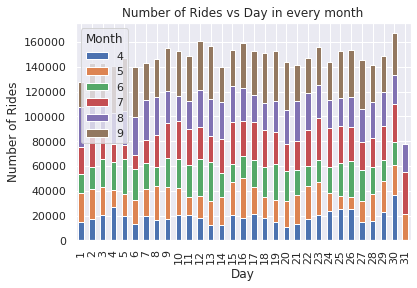

In [0]:
data.groupby(['Day','Month']).size().unstack().plot(kind='bar',stacked=True)
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Day in every month')
plt.show()

**Grouping by WeekDay**

In [0]:
weekday_ride_data = data.groupby('Dayy')['Date/Time'].count()
weekday_ride_data = weekday_ride_data.reset_index()
weekday_ride_data = weekday_ride_data.rename(columns = {'Date/Time':'ride_count'})
weekday_ride_data.head()

,Dayy,ride_count
0,Friday,741139
1,Monday,541472
2,Saturday,646114
3,Sunday,490180
4,Thursday,755145


**Bar Graph of Number of rides per day of a week**

Text(0.5, 1.0, 'Number of Rides vs WeekDay')

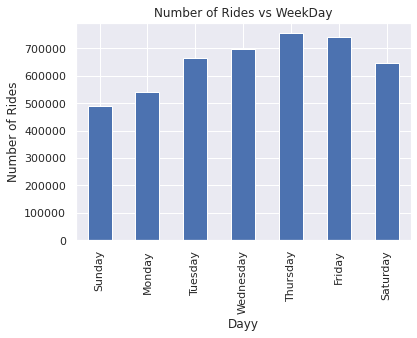

In [0]:
WD=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
p=data.groupby(['Dayy']).size()
p.reindex(WD).plot(kind='bar')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs WeekDay')

**Grouping by Month**

In [0]:
m_ride_data = data.groupby(['Month'])['Date/Time'].count()
m_ride_data = m_ride_data.reset_index()
m_ride_data = m_ride_data.rename(columns = {'Date/Time':'ride_count'})
m_ride_data.head()

,Month,ride_count
0,4,564516
1,5,652435
2,6,663844
3,7,796121
4,8,829275


**Bar Graph of Number of rides in every month**

Text(0.5, 1.0, 'Number of Rides vs Month')

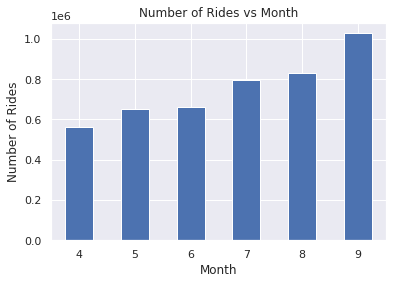

In [0]:
data.groupby(['Month']).size().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Month')

**Grouping by WeekDay and Month**

In [0]:
dm_ride_data = data.groupby(['Dayy','Month'])['Date/Time'].count()
dm_ride_data = dm_ride_data.reset_index()
dm_ride_data = dm_ride_data.rename(columns = {'Date/Time':'ride_count'})
dm_ride_data.head()

,Dayy,Month,ride_count
0,Friday,4,90303
1,Friday,5,133991
2,Friday,6,105056
3,Friday,7,102735
4,Friday,8,148674


**Bar Graph of Number of rides per day of a week in different months**

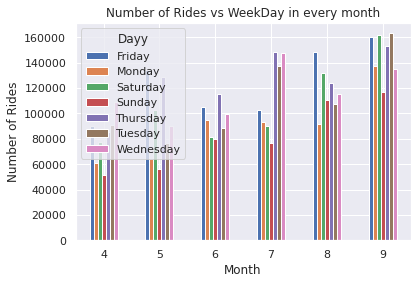

In [0]:
data.groupby(['Month','Dayy']).size().unstack().plot(kind='bar',stacked=False)
plt.xticks(rotation=0)
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs WeekDay in every month')
plt.show()

**Grouping by Base**

In [0]:
b_ride_data = data.groupby(['Base'])['Date/Time'].count()
b_ride_data = b_ride_data.reset_index()
b_ride_data = b_ride_data.rename(columns = {'Date/Time':'ride_count'})
b_ride_data.head()

,Base,ride_count
0,B02512,205673
1,B02598,1393113
2,B02617,1458853
3,B02682,1212789
4,B02764,263899


**Bar Graph of Number of rides in different bases**

Text(0.5, 1.0, 'Number of Rides vs Base')

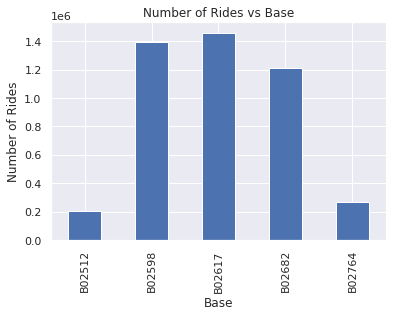

In [0]:
data.groupby(['Base']).size().plot(kind='bar')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Base')

**Grouping by Base and Month**

In [0]:
bm_ride_data = data.groupby(['Base','Month'])['Date/Time'].count()
bm_ride_data = bm_ride_data.reset_index()
bm_ride_data = bm_ride_data.rename(columns = {'Date/Time':'ride_count'})
bm_ride_data.head()

,Base,Month,ride_count
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472


**Bar Graph of Number of rides per every base in different months**

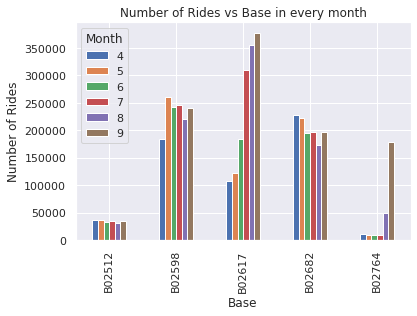

In [0]:
data.groupby(['Base','Month']).size().unstack().plot(kind='bar',stacked=False)
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Base in every month')
plt.show()

#**HEAT MAPS**

**Grouping by Day and Hour**

In [0]:
g_ride_data = data.groupby(['Day','Hour'])['Date/Time'].count()
g_ride_data = g_ride_data.reset_index()
g_ride_data = g_ride_data.rename(columns = {'Date/Time':'ride_count'})
g_ride_data.head()

,Day,Hour,ride_count
0,1,0,3247
1,1,1,1982
2,1,2,1284
3,1,3,1331
4,1,4,1458


**Heat Map of Number of rides per Hour and Day**

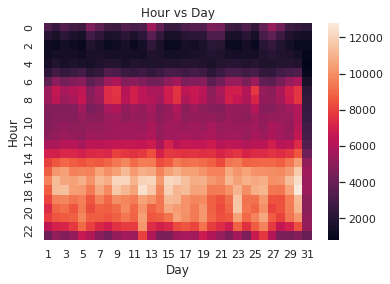

In [0]:
result = g_ride_data.pivot(index='Hour', columns='Day', values='ride_count')
sns.heatmap(result)
plt.title('Hour vs Day')
plt.show()

**Grouping by Day and Month**

In [0]:
g_ride_data = data.groupby(['Day','Month'])['Date/Time'].count()
g_ride_data = g_ride_data.reset_index()
g_ride_data = g_ride_data.rename(columns = {'Date/Time':'ride_count'})
g_ride_data.head()

,Day,Month,ride_count
0,1,4,14546
1,1,5,23375
2,1,6,15967
3,1,7,21228
4,1,8,32353


**Heat Map of Number of rides per Month and Day**

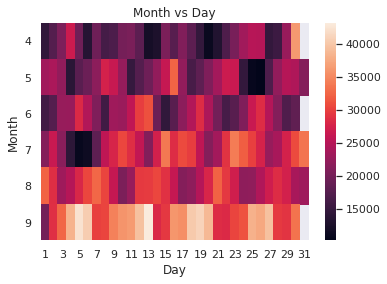

In [0]:
result = g_ride_data.pivot(index='Month', columns='Day', values='ride_count')
sns.heatmap(result)
plt.yticks(rotation=0)
plt.title('Month vs Day')
plt.show()

**Grouping by WeekDay and Month**

In [0]:
g_ride_data = data.groupby(['Dayy','Month'])['Date/Time'].count()
g_ride_data = g_ride_data.reset_index()
g_ride_data = g_ride_data.rename(columns = {'Date/Time':'ride_count'})
g_ride_data.head()

,Dayy,Month,ride_count
0,Friday,4,90303
1,Friday,5,133991
2,Friday,6,105056
3,Friday,7,102735
4,Friday,8,148674


**Heat Map of Number of rides per Month and WeekDay**

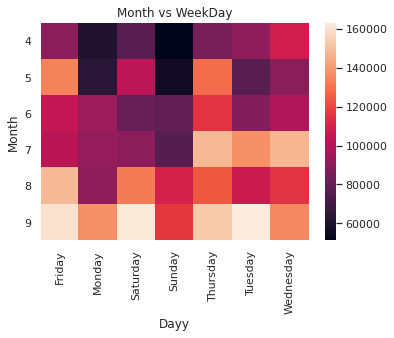

In [0]:
result = g_ride_data.pivot(index='Month', columns='Dayy', values='ride_count')
sns.heatmap(result)
plt.yticks(rotation=0)
plt.title('Month vs WeekDay')
plt.show()

**Grouping by Base and Month**

In [0]:
g_ride_data = data.groupby(['Base','Month'])['Date/Time'].count()
g_ride_data = g_ride_data.reset_index()
g_ride_data = g_ride_data.rename(columns = {'Date/Time':'ride_count'})
g_ride_data.head()

,Base,Month,ride_count
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472


**Heat Map of Number of rides per Month and Base**

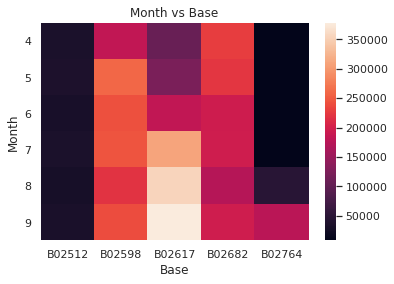

In [0]:
result = g_ride_data.pivot(index='Month', columns='Base', values='ride_count')
sns.heatmap(result)
plt.yticks(rotation=0)
plt.title('Month vs Base')
plt.show()

**Grouping by Base and WeekDay**

In [0]:
g_ride_data = data.groupby(['Base','Dayy'])['Date/Time'].count()
g_ride_data = g_ride_data.reset_index()
g_ride_data = g_ride_data.rename(columns = {'Date/Time':'ride_count'})
g_ride_data.head()

,Base,Dayy,ride_count
0,B02512,Friday,33319
1,B02512,Monday,25460
2,B02512,Saturday,26773
3,B02512,Sunday,20490
4,B02512,Thursday,35032


**Heat Map of Number of rides per WeekDay and Base**

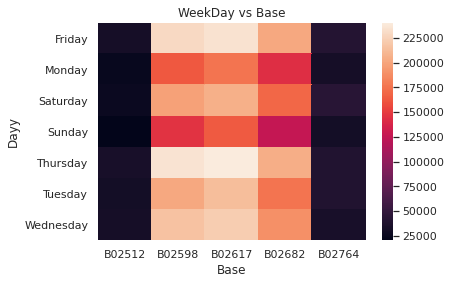

In [0]:
result = g_ride_data.pivot(index='Dayy', columns='Base', values='ride_count')
sns.heatmap(result)
plt.title('WeekDay vs Base')
plt.show()

#**GEO-PLOT**

**Geo-plot based on uber rides during 2014 (April-September)**

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 71701 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


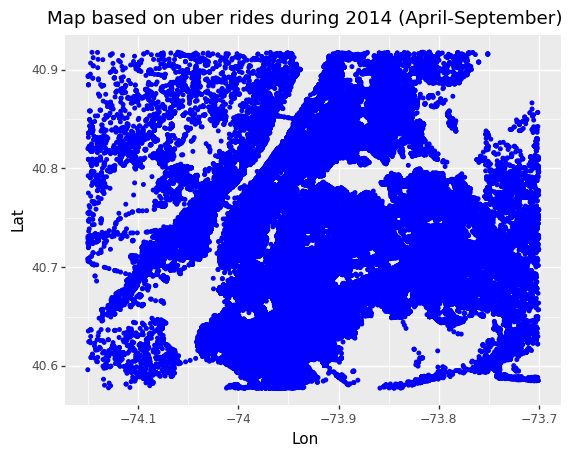

<ggplot: (-9223363281325415038)>

In [0]:
min_lat = 40.5774
max_lat = 40.9176
min_long = -74.15
max_long = -73.7004

(ggplot(data, aes(x="Lon", y="Lat")) 
+geom_point(size=1, color = "blue")
+scale_x_continuous(limits=(min_long, max_long))
+scale_y_continuous(limits=(min_lat, max_lat))
+ggtitle("Map based on uber rides during 2014 (April-September)"))

**Geo-plot based on uber rides during 2014 (April-September) by Base**

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 71701 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


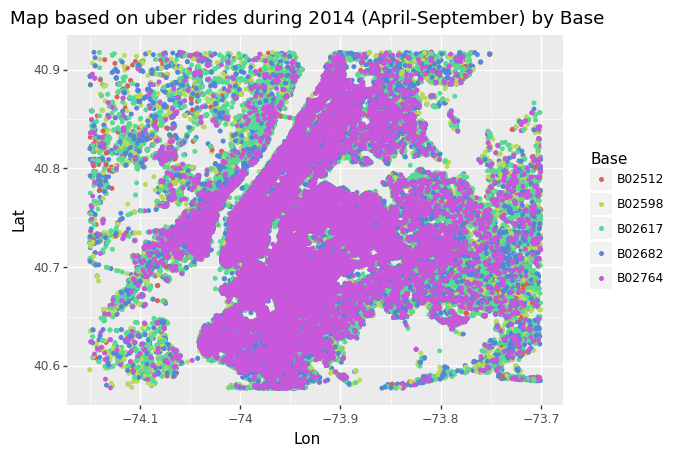

<ggplot: (-9223363281325415003)>

In [0]:
(ggplot(data, aes(x="Lon", y="Lat", color = "Base"))
+geom_point(size=1) 
+scale_x_continuous(limits=(min_long, max_long))
+scale_y_continuous(limits=(min_lat, max_lat))
+ggtitle("Map based on uber rides during 2014 (April-September) by Base"))